In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as st
%matplotlib inline
import seaborn as sns

**1. Загрузим файл HR.csv в pandas dataframe**

In [ ]:
df = pd.read_csv('HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


*Данные без пропусков, типы данных корректны.*

**2. Рассчитаем основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).**


In [ ]:
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


**3. Рассчитаем и визуализируем корреляционную матрицу для количественных переменных.**
**Определим две самые скоррелированные и две наименее скоррелированные переменные.**


In [ ]:
df.iloc[:,0:5].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


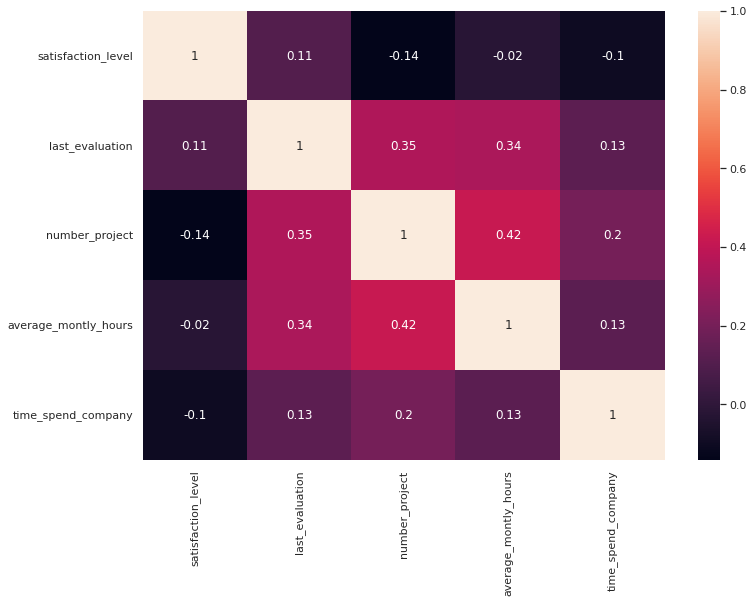

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.iloc[:,0:5].corr(), annot=True)

*Две самые скоррелированные переменные - average_montly_hours и number_project, есть слабая прямая связь между среднем количеством часов на работе и количеством проектов.*

*Две наименее скоррелированные переменные - average_montly_hours и satisfaction_level, на уровень удовлетворенности не влияет количество часов на работе.*

**4. Рассчитаем сколько сотрудников работает в каждом департаменте.**


In [ ]:
# количество не уволившихся сотрудников

df[df['left'] == 0]['department'].value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: department, dtype: int64

In [ ]:
print(f"Общее количество не уволившихся сотрудников: {len(df[df['left'] == 0]['department'])}")

Общее количество не уволившихся сотрудников: 11428


*Больше половины сотрудников работают в отделах Sales, Technical, Support. Меньше всего в отделе Hr и Management.*

**5. Распределение сотрудников по зарплатам.**

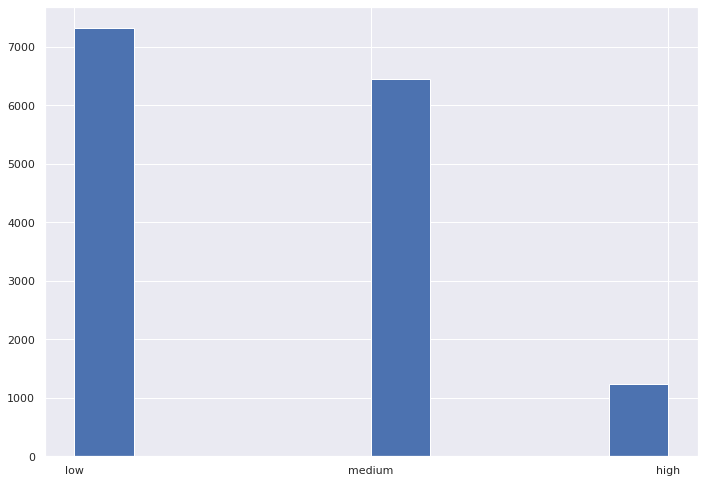

In [ ]:
plt.hist(df['salary']);

*Больше всего сотрудников с уровнем зарплаты "Low", на втором месте с небольшой разницей - уровень "Medium", и совсем небольшой % сотрудников с зарплатой уровня "High".*

**6. Распределение сотрудников по зарплатам в каждом департаменте по отдельности**


Text(0.5, 1.0, 'hr')

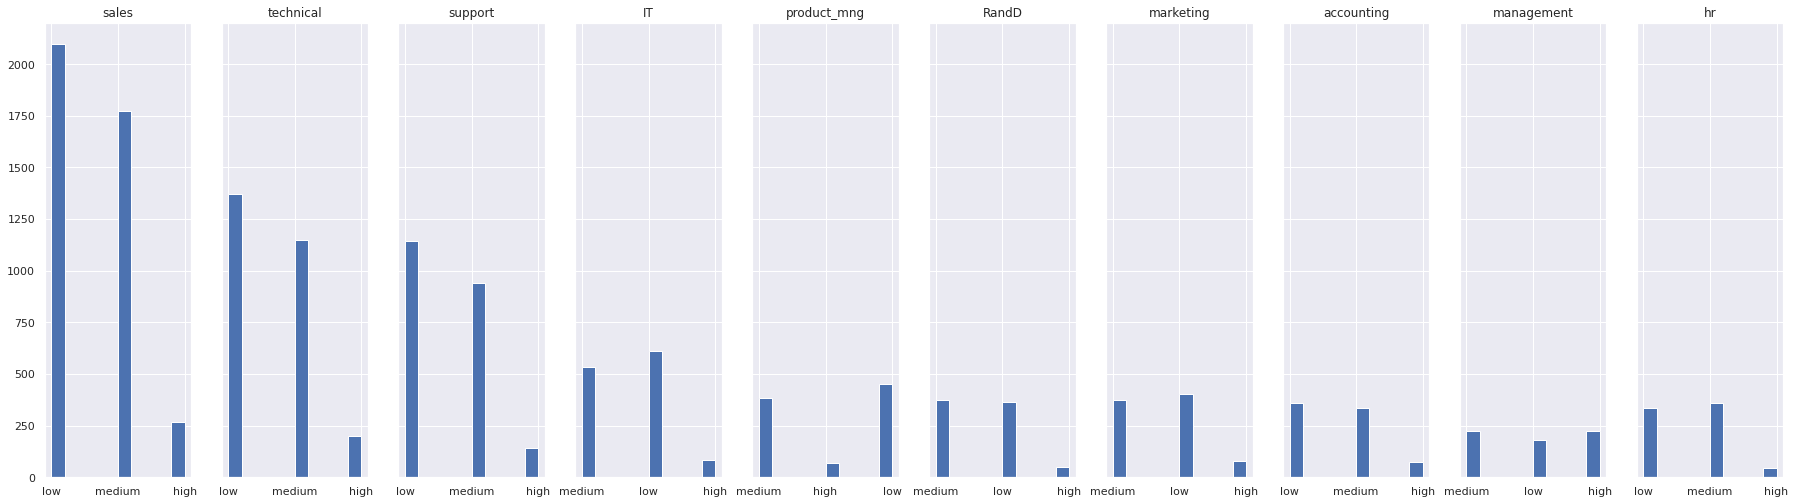

In [ ]:
fig, axs = plt.subplots(1, 10, figsize=(25, 7), sharey=True)
plt.tight_layout()

axs[0].hist(df[df['department']=='sales']['salary'])
axs[0].set_title('sales')
plt.ylim(0, 2200)

axs[1].hist(df[df['department']=='technical']['salary'])
axs[1].set_title('technical')

axs[2].hist(df[df['department']=='support']['salary'])
axs[2].set_title('support')

axs[3].hist(df[df['department']=='IT']['salary'])
axs[3].set_title('IT')

axs[4].hist(df[df['department']=='product_mng']['salary'])
axs[4].set_title('product_mng')

axs[5].hist(df[df['department']=='RandD']['salary'])
axs[5].set_title('RandD')

axs[6].hist(df[df['department']=='marketing']['salary'])
axs[6].set_title('marketing')

axs[7].hist(df[df['department']=='accounting']['salary'])
axs[7].set_title('accounting')

axs[8].hist(df[df['department']=='management']['salary'])
axs[8].set_title('management')

axs[9].hist(df[df['department']=='hr']['salary'])
axs[9].set_title('hr')

*Распделение зарплат по отделам не отличается от общего распределения зарплат, то есть большинство получают зарплату Low, меньшинство - зарплату High. Но в отделе Management, наоборот, большинство получают зарплату High и Medium, а меньшинство - Low.*

**7. Проверим гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом**


In [ ]:
# сотрудники с высоким окладом

df_high = df[df['salary'] == 'high']
df_high.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
72,0.45,0.49,2,149,3,0,1,0,product_mng,high
111,0.09,0.85,6,289,4,0,1,0,hr,high
189,0.44,0.51,2,156,3,0,1,0,technical,high
267,0.45,0.53,2,129,3,0,1,0,technical,high
306,0.37,0.46,2,149,3,0,1,0,marketing,high


In [ ]:
# сотрудники с низким окладом
df_low = df[df['salary'] == 'low']
df_low.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low


Text(0.5, 0, 'Среднее количество часов в месяц')

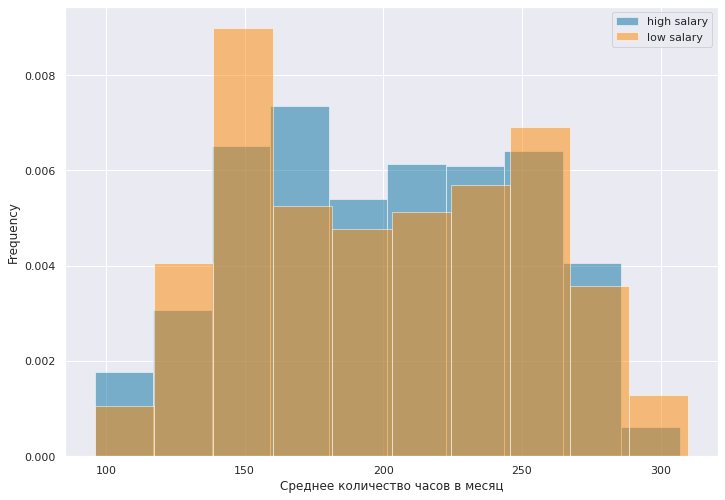

In [ ]:
# построим гистограмму

df_high['average_montly_hours'].plot(kind = 'hist', color = '#0772A1',
                     alpha = 0.5,
                    label = 'high salary',
                    density = True)
df_low['average_montly_hours'].plot(kind = 'hist', color = '#FF8700',
                     alpha = 0.5,
                    label = 'low salary',
                    density = True)
plt.legend(loc='best')
plt.xlabel('Среднее количество часов в месяц')

*Значения скорее всего распределены не по нормальному закону, проверим на тесте Шапиро-Уилка.*

In [ ]:
# проверим данные на нормальное распределение с помощью теста Шапиро-Уилка
# H0: Данные распределены по нормальному закону.
# H1: Данные не распределены по нормальному закону.
# уровень доверия - 95%


stat, p = st.shapiro(df_high['average_montly_hours'])     #для высоких зарплат

print('stat=%.3f, p=%.5f' % (stat, p))
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat=0.971, p=0.00000
Вероятно не нормальное распределение


In [ ]:
stat, p = st.shapiro(df_low['average_montly_hours'])     # для низких зарплат

print('stat=%.3f, p=%.5f' % (stat, p))
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat=0.960, p=0.00000
Вероятно не нормальное распределение


*Данные, вероятно, не распределены по нормальному закону, поэтому для проверки гипотезы используем тест Манна-Уитни*

In [ ]:
# Гипотеза:
# H0: Распределения одинаковы, сотрудники с высоким и низким окладом проводят на работе одинаковое количество времени.
# H1: Распределения различаются, время на работе сотрудников с высоким окладом отличается от сотрудников с низким окладом.
# уровень доверия - 95%


stat, p = st.mannwhitneyu(df_high['average_montly_hours'],df_low['average_montly_hours'])

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 4507096.50000, p = 0.82413
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


С вероятностью 95% время на работе сотрудников с высоким окладом не отличается от времени на работе сотрудников с низким окладом.

**8. Рассчитаем следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):**

**- Доля сотрудников с повышением за последние 5 лет**

**- Средняя степень удовлетворенности**

**- Среднее количество проектов**


In [ ]:
df_left_true = df[df['left']== 1]         # среди уволившихся
df_left_false = df[df['left']== 0]        # среди  не уволившихся сотрудников


In [ ]:
# Доля сотрудников с повышением за последние 5 лет

share_left_true = len(df_left_true[df_left_true['promotion_last_5years'] == 1])/len(df_left_true)*100
share_left_false = len(df_left_false[df_left_false['promotion_last_5years'] == 1])/len(df_left_false)*100

print(f'Доля сотрудников с повышением за последние 5 лет среди уволившихся: {share_left_true:.2f}%')
print(f'Доля сотрудников с повышением за последние 5 лет среди не уволившихся: {share_left_false:.2f}%')

Доля сотрудников с повышением за последние 5 лет среди уволившихся: 0.53%
Доля сотрудников с повышением за последние 5 лет среди не уволившихся: 2.63%


In [ ]:
# Средняя степень удовлетворенности

print(f"Средняя степень удовлетворенности среди уволившихся: {df_left_true['satisfaction_level'].mean():.2f}")
print(f"Средняя степень удовлетворенности среди не уволившихся: {df_left_false['satisfaction_level'].mean():.2f}")

Средняя степень удовлетворенности среди уволившихся: 0.44
Средняя степень удовлетворенности среди не уволившихся: 0.67


In [ ]:
# Среднее количество проектов

print(f"Среднее количество проектов среди уволившихся:  {df_left_true['number_project'].mean():.0f}")
print(f"Среднее количество проектов среди не уволившихся:  {df_left_false['number_project'].mean():.0f}")

Среднее количество проектов среди уволившихся:  4
Среднее количество проектов среди не уволившихся:  4


**9. Разделим данные на тестовую и обучающую выборки.**

**Построим модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).**

**Оценим качество модели на тестовой выборки.**


In [ ]:
# переменные-предикторы в модели

data = df.drop(['left', 'department', 'salary'], axis = 1)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


In [ ]:
# зависимая переменная y

data_class = df.loc[:,['left']]

In [ ]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data, data_class, random_state=42)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [ ]:
# обучаем данные

lda.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [ ]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# расчет точности
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, lda.predict(X_test))

0.7536

Модель LDA для предсказывания увольнения сотрудника работает с точностью 0.75